In [2]:
import os
os.chdir('/global/homes/l/ltshu/Simulation/Rattle')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core import Structure, Lattice, Molecule
from pymatgen.analysis.structure_matcher import StructureMatcher, ElementComparator
from pymatgen.io.ase import AseAtomsAdaptor

from ase.io import read, write

# Shift rattle method
import shift_rattle

# get the relaxed structure and eng
import atoms_minimize

In [4]:
import sys
sys.path.append('/global/homes/l/ltshu/Simulation/SHGO')
import pot_swkc
import pot_swkc_min

In [5]:
sys.path.append('/global/homes/l/ltshu/Simulation/struc_compare/structurematcher')
import struc_Matcher

## 1: Only shift on $a_1$ direction
### Case1: Structure: 2D MoS2 bilayer, AA structure 6x6

In [5]:
unit_cell = read('/global/homes/l/ltshu/Simulation/struc_compare/structurematcher/MoS2_monolayer.xyz')
at = read('/global/homes/l/ltshu/Simulation/struc_compare/build_struc/MoS2-Bilayer_AA_6atoms.xyz')

unit_vectors = unit_cell.get_cell()
unit_vectors

Cell([[3.16021, 0.0, 0.0], [-1.5801049999999994, 2.7368221412936213, 0.0], [0.0, 0.0, 12.294]])

In [6]:
pot_swkc.Pot_swkc(at)

/global/homes/l/ltshu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


-7.399895803186293

In [10]:
N = 20
shifted_vectors = [i/N * unit_vectors[0] for i in range(0, N+1)]

In [11]:
shifted_vectors

[array([0., 0., 0.]),
 array([0.1580105, 0.       , 0.       ]),
 array([0.316021, 0.      , 0.      ]),
 array([0.4740315, 0.       , 0.       ]),
 array([0.632042, 0.      , 0.      ]),
 array([0.7900525, 0.       , 0.       ]),
 array([0.948063, 0.      , 0.      ]),
 array([1.1060735, 0.       , 0.       ]),
 array([1.264084, 0.      , 0.      ]),
 array([1.4220945, 0.       , 0.       ]),
 array([1.580105, 0.      , 0.      ]),
 array([1.7381155, 0.       , 0.       ]),
 array([1.896126, 0.      , 0.      ]),
 array([2.0541365, 0.       , 0.       ]),
 array([2.212147, 0.      , 0.      ]),
 array([2.3701575, 0.       , 0.       ]),
 array([2.528168, 0.      , 0.      ]),
 array([2.6861785, 0.       , 0.       ]),
 array([2.844189, 0.      , 0.      ]),
 array([3.0021995, 0.       , 0.       ]),
 array([3.16021, 0.     , 0.     ])]

In [19]:
import importlib
importlib.reload(shift_rattle)
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [17]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

In [18]:
shifted_unrelaxed_engs

[-9.49506489128412,
 -9.500868353095095,
 -9.518051562855648,
 -9.545075301782243,
 -9.57933880668018,
 -9.61718903092487,
 -9.65445884917577,
 -9.687225325512435,
 -9.712502124231529,
 -9.72823537502369,
 -9.733534478057353,
 -9.728235375023692,
 -9.712502124231529,
 -9.687225325512435,
 -9.65445884917577,
 -9.617189030924868,
 -9.579338806680179,
 -9.545075301782243,
 -9.518051562855648,
 -9.500868353095095,
 -9.49506489128412]

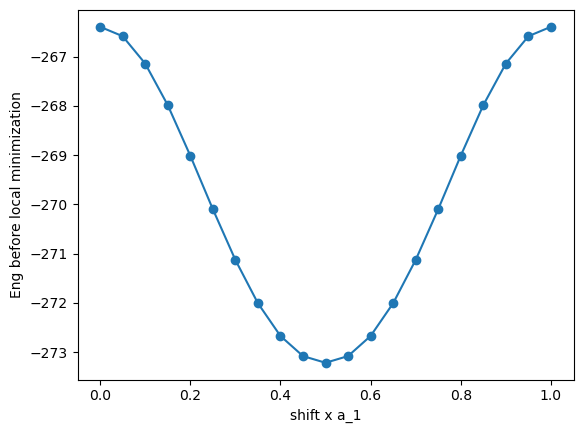

In [10]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_unrelaxed_engs, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng before local minimization")
plt.show()

这个为什么和三角函数的表达式一模一样啊啊啊？能从公式当中理论证明吗？

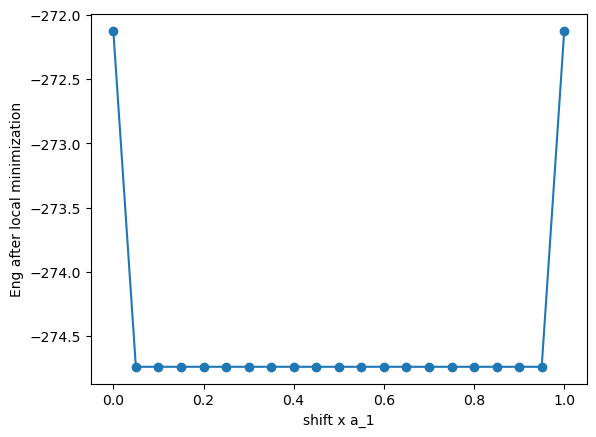

In [11]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_relaxed_engs, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng after local minimization")
plt.show()

为什么会在偏移一点以后全部都一模一样，但没偏移的时候就越不过某个barrier?

会不会是因为，在那个地方，导数为0，不会滑到下边，但是其他情况下都会滑到下边

next step: 查看relaxation之后的结构是不是一样的（所以atom_minimize到底为什么不行。。）

### Case2: Structure: 1D MoS2 Bilayer 25-26atoms 

In [12]:
at1 = read('/global/homes/l/ltshu/Simulation/struc_compare/config_his/1D_25cells_0deg.xyz')

In [13]:
shifted_relaxed_engs1 = []
shifted_unrelaxed_engs1 = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at1, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs1.append(unrelaxed_eng)
    shifted_relaxed_engs1.append(relaxed_eng)

why 25-26 atoms the difference is so small???

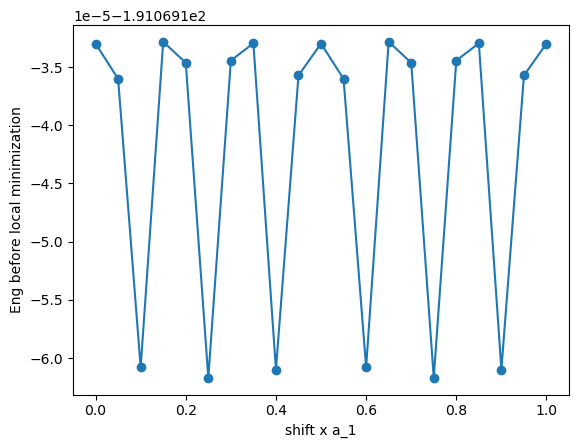

In [14]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_unrelaxed_engs1, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng before local minimization")
plt.show()

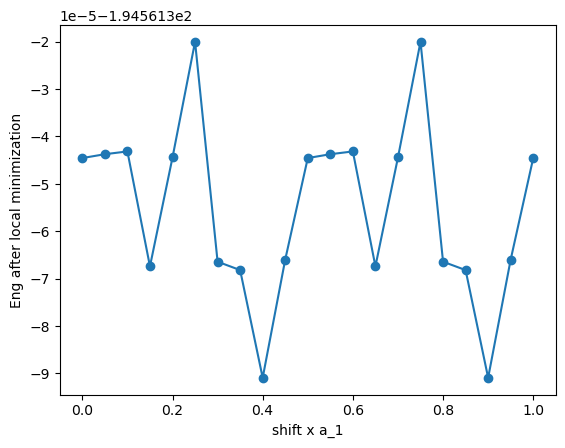

In [15]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_relaxed_engs1, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng after local minimization")
plt.show()

### Case3: test structure: 1D MoS2 bilayer AA 6atoms

In [16]:
at2 = read('/global/homes/l/ltshu/Simulation/struc_compare/build_struc/MoS2-Bilayer_AA_6atoms.xyz')

In [17]:
shifted_relaxed_engs2 = []
shifted_unrelaxed_engs2 = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at2, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs2.append(unrelaxed_eng)
    shifted_relaxed_engs2.append(relaxed_eng)

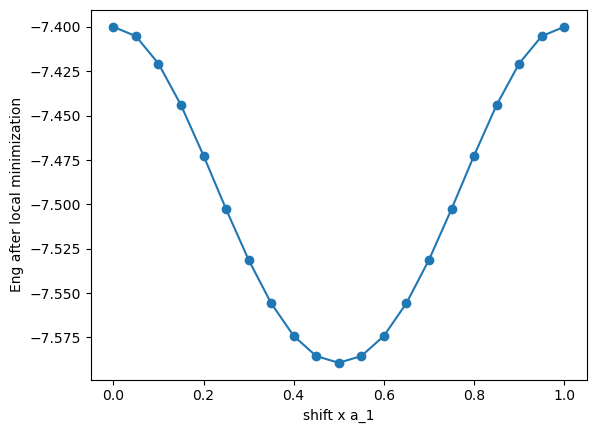

In [18]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_unrelaxed_engs2, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng after local minimization")
plt.show()

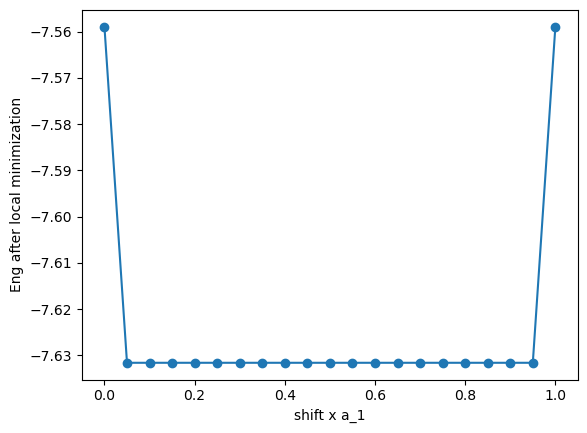

In [19]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_relaxed_engs2, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng after local minimization")
plt.show()

This situation is the same as case1, very reasonable.

### Case4: Heterostructure MoS2/WSe2 1D bilayer 26-27atoms

In [20]:
at3 = read('/global/homes/l/ltshu/Simulation/SHGO/MoS2WSe2_1D_Stretch_26atoms.xyz')

In [21]:
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [22]:
shifted_relaxed_engs3 = []
shifted_unrelaxed_engs3 = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at3, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs3.append(unrelaxed_eng)
    shifted_relaxed_engs3.append(relaxed_eng)

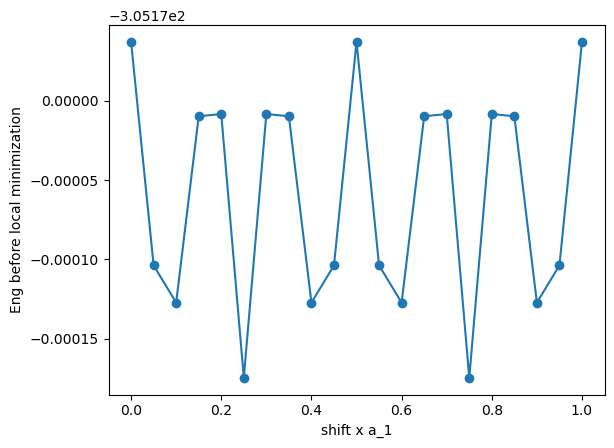

In [23]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_unrelaxed_engs3, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng before local minimization")
plt.show()

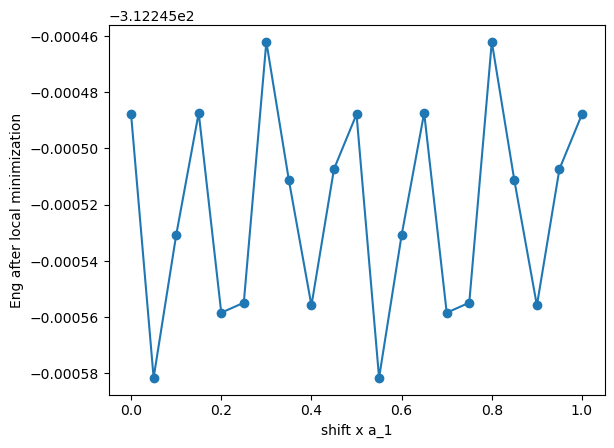

In [24]:
num = [i/N for i in range(0, N+1)]
plt.plot(num, shifted_relaxed_engs3, marker='o', linestyle='-')
plt.xlabel("shift x a_1")
plt.ylabel("Eng after local minimization")
plt.show()

### Conclusion: 
When the two layers are the same, kind of a harmonic oscillator? At this time, maybe only one local minimum (in the middle).

When the two layers are not same (and we choose a supercell), then there $\frac{a_1}{2}$ seem to be the period. At this time, the situation and the curve are more complecated, there are many local minima.

## Shift on both $a_1$ and $a_2$

In [12]:
N = 30
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

### Case1: 2D MoS2 bilayer, AA, 6x6

In [7]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [8]:
at = read('/global/homes/l/ltshu/Simulation/struc_compare/build_struc/MoS2-Bilayer_AA_6x6.xyz')

In [9]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

NameError: name 'shifted_vectors' is not defined

In [13]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

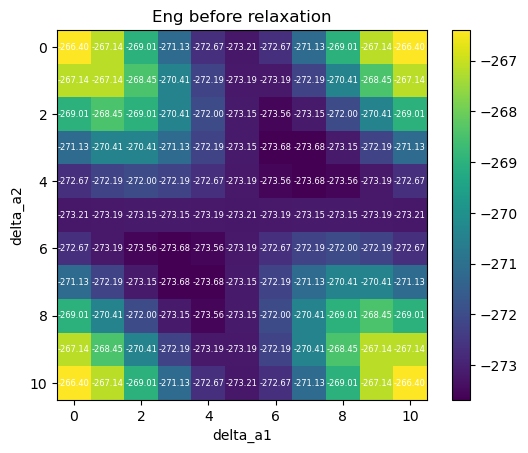

In [15]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix1, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix1):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng before relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

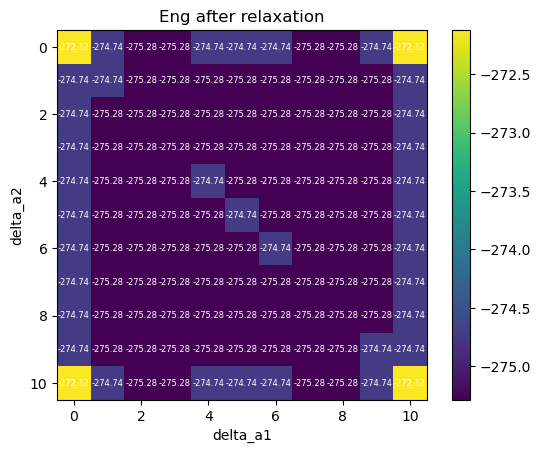

In [16]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix2, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix2):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng after relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

### Case2: 1D MoS2 Bilayer 25-26atoms

In [81]:
at1 = read('/global/homes/l/ltshu/Simulation/struc_compare/config_his/1D_25cells_0deg.xyz')

N= 10

In [82]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [83]:
shifted_relaxed_engs1 = []
shifted_unrelaxed_engs1 = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at1, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs1.append(unrelaxed_eng)
    shifted_relaxed_engs1.append(relaxed_eng)

In [84]:
matrix11 = np.reshape(shifted_unrelaxed_engs1, (N+1, N+1))
matrix12 = np.reshape(shifted_relaxed_engs1, (N+1, N+1))

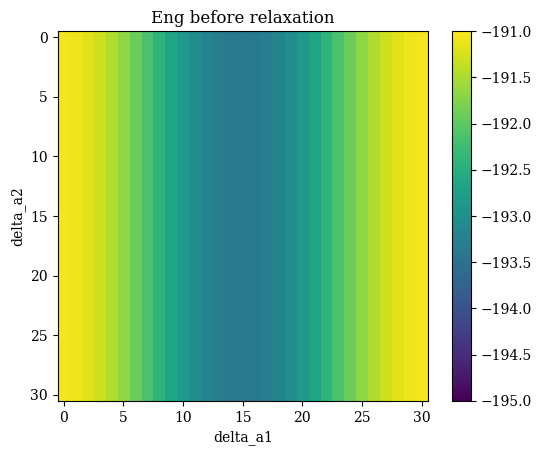

In [85]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix11, cmap='viridis', vmin = -195, vmax = -191, interpolation='none')

fig.colorbar(cax)
plt.title('Eng before relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

草这个图真的画反了，$\delta a_1$和$\delta a_2$互换一下，或者就是把这两个在最开始换一下，图不用改。。

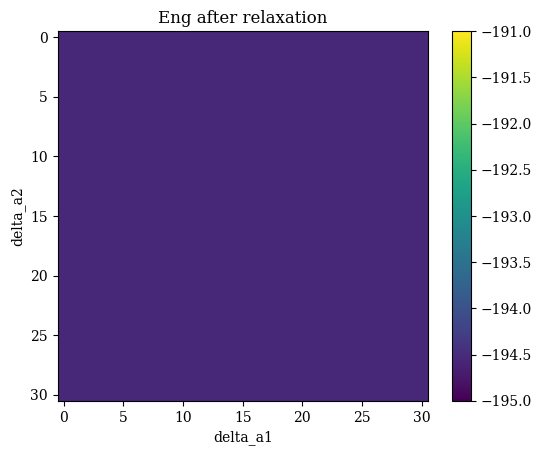

In [86]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix12, cmap='viridis', vmin=-195, vmax = -191, interpolation='none')

fig.colorbar(cax)
plt.title('Eng after relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

In [1]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix11, cmap='viridis', vmin=-195, vmax = -191,interpolation='none')
cbar1 = fig.colorbar(cax1)

axs[0].set_title('Energy before relaxation (eV)', fontsize=15)
axs[0].set_xlabel(r"$\delta_{\vec{a}_1}$", fontsize=15)
axs[0].set_ylabel(r"$\delta_{\vec{a}_2}$", fontsize=15)

cax2 = axs[1].imshow(matrix12, cmap='viridis', vmin=-195, vmax = -191,interpolation='none')
cbar2 = fig.colorbar(cax2)
axs[1].set_title('Energy after relaxation (eV)', fontsize=15)
axs[1].set_xlabel(r"$\delta_{\vec{a}_1}$", fontsize=15)
axs[1].set_ylabel(r"$\delta_{\vec{a}_2}$", fontsize=15)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10    
plt.rcParams['font.weight'] = 'medium'

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.savefig('plot.svg', format='svg')
plt.show()

NameError: name 'plt' is not defined

N = 30

In [73]:
at = read('/global/homes/l/ltshu/Simulation/SHGO/MoS2WSe2_1D_Stretch_26atoms.xyz')
unit_cell = read('/global/homes/l/ltshu/Simulation/struc_compare/structurematcher/MoS2_monolayer.xyz')

unit_vectors = unit_cell.get_cell()

N = 30
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [74]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [75]:
shifted_unrelaxed_engs = []
shifted_relaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at1, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

In [76]:
shifted_unrelaxed_engs

[-291.5640987027646,
 -291.5922516029678,
 -291.68459283103107,
 -291.83755093122073,
 -292.0447399864016,
 -292.2975278205138,
 -292.58494060707505,
 -292.89436735585355,
 -293.21204856450726,
 -293.5236017792497,
 -293.8153657630098,
 -294.07413926028573,
 -294.2887070751358,
 -294.44943284678396,
 -294.5503898635353,
 -294.58693969229967,
 -294.557996108018,
 -294.4644204651607,
 -294.3106133664557,
 -294.1022314516369,
 -293.8486279878626,
 -293.56074516116894,
 -293.2515492812986,
 -292.9345333154631,
 -292.62398049475365,
 -292.3336337359115,
 -292.0761727177962,
 -291.86272526904554,
 -291.70218508461676,
 -291.60130005007164,
 -291.5640987027647,
 -291.56409923958074,
 -291.59225131642296,
 -291.68464052208515,
 -291.83762094580203,
 -292.04476599834646,
 -292.2975046338956,
 -292.58491392456835,
 -292.8943672062088,
 -293.212047670523,
 -293.52357839181826,
 -293.815391354593,
 -294.0741170720693,
 -294.2887310324941,
 -294.44952688631304,
 -294.550389891376,
 -294.58698576275

In [77]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

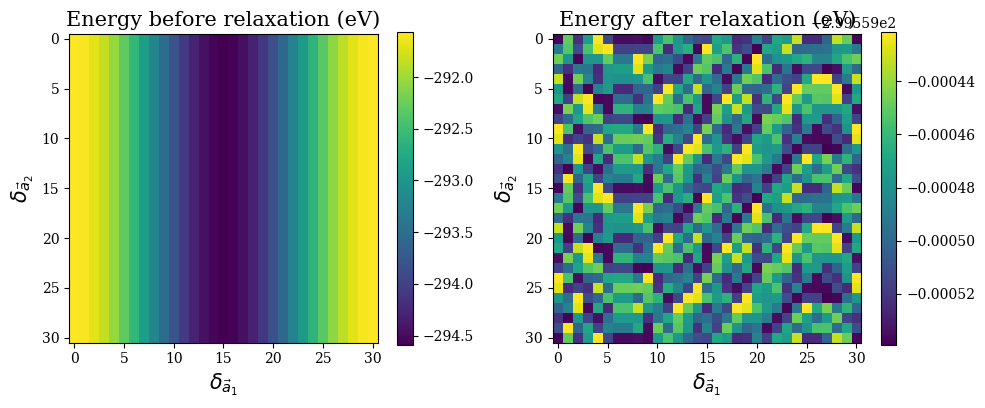

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
cbar1 = fig.colorbar(cax1)

axs[0].set_title('Energy before relaxation (eV)', fontsize=15)
axs[0].set_xlabel(r"$\delta_{\vec{a}_1}$", fontsize=15)
axs[0].set_ylabel(r"$\delta_{\vec{a}_2}$", fontsize=15)

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
cbar2 = fig.colorbar(cax2)
axs[1].set_title('Energy after relaxation (eV)', fontsize=15)
axs[1].set_xlabel(r"$\delta_{\vec{a}_1}$", fontsize=15)
axs[1].set_ylabel(r"$\delta_{\vec{a}_2}$", fontsize=15)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10    
plt.rcParams['font.weight'] = 'medium'

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.savefig('plot.svg', format='svg')
plt.show()

### Case3: 1D MoS2/WSe2 bilayer 26-27 atoms

In [23]:
at3 = read('/global/homes/l/ltshu/Simulation/SHGO/MoS2WSe2_1D_Stretch_26atoms.xyz')

In [24]:
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [25]:
shifted_relaxed_engs3 = []
shifted_unrelaxed_engs3 = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at3, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs3.append(unrelaxed_eng)
    shifted_relaxed_engs3.append(relaxed_eng)

In [26]:
matrix31 = np.reshape(shifted_unrelaxed_engs3, (N+1, N+1))
matrix32 = np.reshape(shifted_relaxed_engs3, (N+1, N+1))

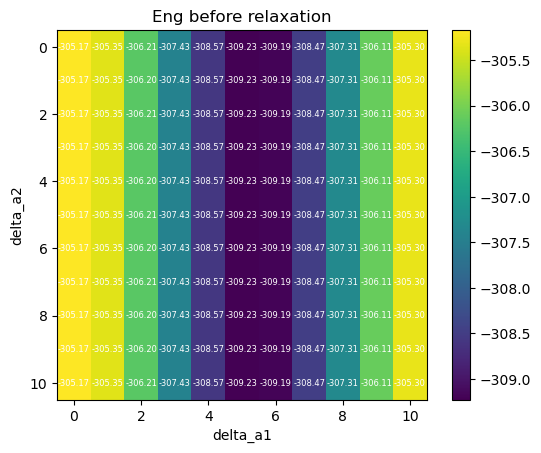

In [28]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix31, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix31):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng before relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

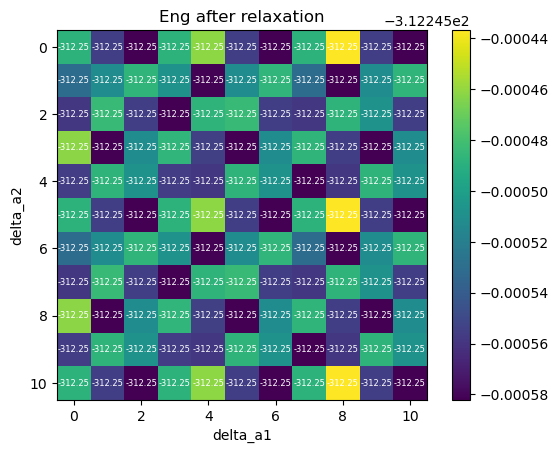

In [29]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix32, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix32):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng after relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

### Conclusion: 
After relaxation, these structures are almost the same.

## Further: AA 6 atoms
### Case1: N = 30

In [6]:
unit_cell = read('/global/homes/l/ltshu/Simulation/struc_compare/build_struc/MoS2_monolayer.xyz')
at = read('/global/homes/l/ltshu/Simulation/struc_compare/build_struc/MoS2-Bilayer_AA_6atoms.xyz')

unit_vectors = unit_cell.get_cell()
unit_vectors

Cell([[3.16021, 0.0, 0.0], [-1.5801049999999994, 2.7368221412936213, 0.0], [0.0, 0.0, 12.294]])

In [7]:
N = 30
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [8]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [9]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

/global/homes/l/ltshu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


In [10]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

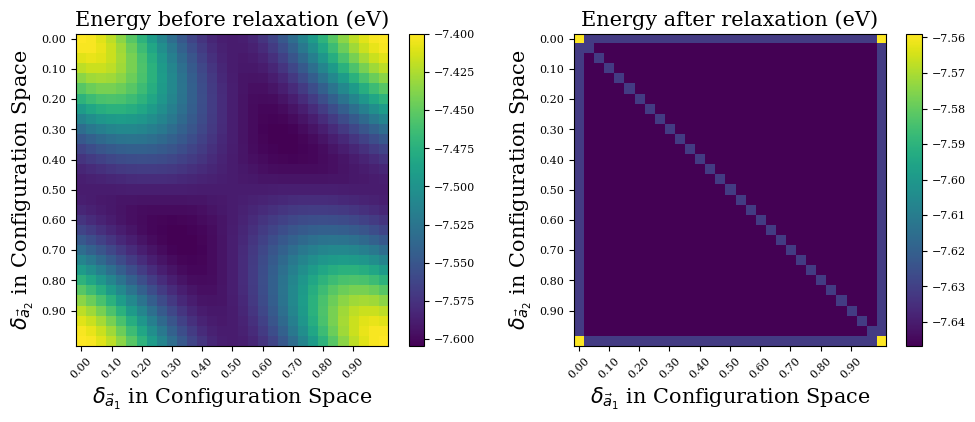

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
cbar1 = fig.colorbar(cax1)

axs[0].set_title('Energy before relaxation (eV)', fontsize=15)
axs[0].set_xlabel(r"$\delta_{\vec{a}_1}$ in Configuration Space", fontsize=15)
axs[0].set_ylabel(r"$\delta_{\vec{a}_2}$ in Configuration Space", fontsize=15)

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
cbar2 = fig.colorbar(cax2)
axs[1].set_title('Energy after relaxation (eV)', fontsize=15)
axs[1].set_xlabel(r"$\delta_{\vec{a}_1}$ in Configuration Space", fontsize=15)
axs[1].set_ylabel(r"$\delta_{\vec{a}_2}$ in Configuration Space", fontsize=15)

ticks = np.arange(0, 30, 3)
tick_labels = ticks / (N)
axs[0].set_xticks(ticks)
axs[0].set_xticklabels([f"{label:.2f}" for label in tick_labels], rotation=45, fontsize=8)
axs[0].set_yticks(ticks)
axs[0].set_yticklabels([f"{label:.2f}" for label in tick_labels])

axs[1].set_xticks(ticks)
axs[1].set_xticklabels([f"{label:.2f}" for label in tick_labels], rotation=45, fontsize=8)
axs[1].set_yticks(ticks)
axs[1].set_yticklabels([f"{label:.2f}" for label in tick_labels])

# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8 
plt.rcParams['font.weight'] = 'medium'

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.savefig('plot.svg', format='svg')
plt.show()

Before relaxation: Two potential wells, on the high symmetry points (1/3, 2/3) & (2/3, 1/3) (If there is no dramatic changes (mutation))

### Case2: N = 10

In [33]:
N = 10
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [34]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

In [35]:
shifted_unrelaxed_engs[:11]

[-7.399895803186293,
 -7.420602893298815,
 -7.472490675510426,
 -7.531260729697153,
 -7.574157987879357,
 -7.58927528933693,
 -7.574157987879357,
 -7.531260729697153,
 -7.472490675510426,
 -7.420602893298815,
 -7.399895803186293]

In [37]:
shifted_relaxed_engs[:11]

[-7.558980027426761,
 -7.6315854277799815,
 -7.631585427781551,
 -7.631585427781861,
 -7.631585427781201,
 -7.631585427780856,
 -7.6315854277812,
 -7.631585427781859,
 -7.631585427781553,
 -7.631585427779981,
 -7.558980027426761]

In [36]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

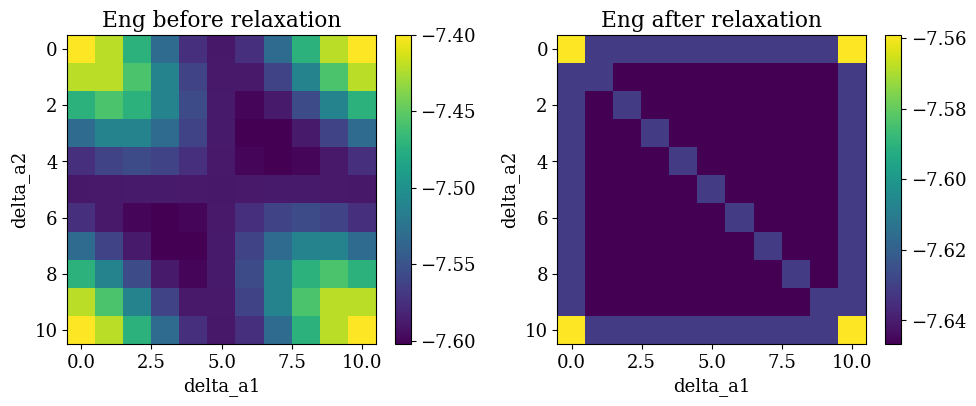

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
fig.colorbar(cax1)
axs[0].set_title('Eng before relaxation')
axs[0].set_xlabel('delta_a1')
axs[0].set_ylabel('delta_a2')

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
fig.colorbar(cax2)
axs[1].set_title('Eng after relaxation')
axs[1].set_xlabel('delta_a1')
axs[1].set_ylabel('delta_a2')

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()

### Case3: N = 3

In [29]:
N = 3
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

In [30]:
shifted_unrelaxed_engs[:4]

[-7.399895803186293, -7.54814049419687, -7.54814049419687, -7.399895803186293]

In [31]:
shifted_relaxed_engs

[-7.558980027426761,
 -7.631585427781211,
 -7.631585427781211,
 -7.558980027426761,
 -7.631585427779934,
 -7.6315854277812125,
 -7.646766439934175,
 -7.631585427779932,
 -7.631585427779931,
 -7.646766439934174,
 -7.6315854277812125,
 -7.631585427779934,
 -7.558980027426761,
 -7.63158542778121,
 -7.631585427781211,
 -7.558980027426763]

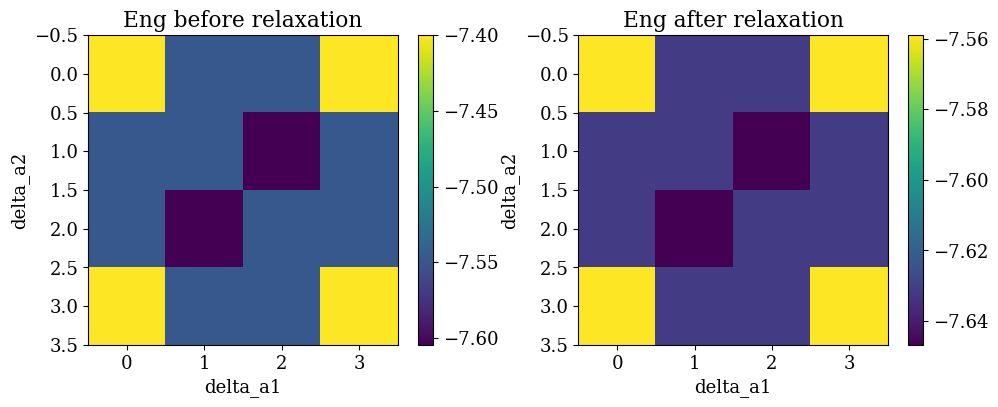

In [32]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
fig.colorbar(cax1)
axs[0].set_title('Eng before relaxation')
axs[0].set_xlabel('delta_a1')
axs[0].set_ylabel('delta_a2')

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
fig.colorbar(cax2)
axs[1].set_title('Eng after relaxation')
axs[1].set_xlabel('delta_a1')
axs[1].set_ylabel('delta_a2')

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()

### Case4: N = 5

In [47]:
N = 5
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

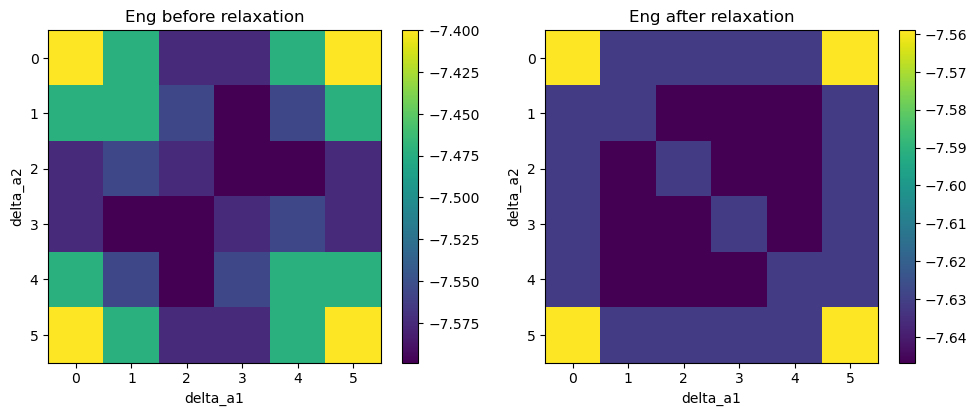

In [48]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
fig.colorbar(cax1)
axs[0].set_title('Eng before relaxation')
axs[0].set_xlabel('delta_a1')
axs[0].set_ylabel('delta_a2')

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
fig.colorbar(cax2)
axs[1].set_title('Eng after relaxation')
axs[1].set_xlabel('delta_a1')
axs[1].set_ylabel('delta_a2')

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()